In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in the files
candi_2015 = pd.read_csv('ELECTION RESULT - 2015 BY CANDIDATE.csv')
state_2015 =pd.read_csv('ELECTION RESULT - 2015 BY STATE.csv')
candi_2019 = pd.read_csv('ELECTION RESULT - 2019 CANDIDATE.csv')
state_2019 = pd.read_csv('ELECTION RESULT - 2019 BY STATE.csv')

# Data Wrangling

In [3]:
#load files
candi_2015_copy = candi_2015.copy()
candi_2015_copy

,Candidate,Party,Votes
0,Muhammadu Buhari,All Progressives Congress,"15,424,921"
1,Goodluck Jonathan,People's Democratic Party,"12,853,162"
2,Adebayo Ayeni,African Peoples Alliance,"53,537"
3,Ganiyu Galadima,Allied Congress Party of Nigeria,"40,311"
4,Sam Eke,Citizens Popular Party,"36,300"
5,Rufus Salau,Alliance for Democracy,"30,673"
6,Mani Ahmad,African Democratic Congress,"29,666"
7,Allagoa Chinedu,Peoples Party of Nigeria,"24,475"
8,Martin Onovo,National Conscience Party,"24,455"
9,Tunde Anifowose-Kelani,Accord Alliance,"22,125"


In [4]:
candi_2015_copy = candi_2015_copy.dropna()
candi_2015_copy

,Candidate,Party,Votes
0,Muhammadu Buhari,All Progressives Congress,"15,424,921"
1,Goodluck Jonathan,People's Democratic Party,"12,853,162"
2,Adebayo Ayeni,African Peoples Alliance,"53,537"
3,Ganiyu Galadima,Allied Congress Party of Nigeria,"40,311"
4,Sam Eke,Citizens Popular Party,"36,300"
5,Rufus Salau,Alliance for Democracy,"30,673"
6,Mani Ahmad,African Democratic Congress,"29,666"
7,Allagoa Chinedu,Peoples Party of Nigeria,"24,475"
8,Martin Onovo,National Conscience Party,"24,455"
9,Tunde Anifowose-Kelani,Accord Alliance,"22,125"


In [5]:
#remove the commas in the votes column and converting to integer
candi_2015_copy.Votes = candi_2015_copy.Votes.str.replace(',','')
candi_2015_copy.Votes = candi_2015_copy.Votes.astype(int)
candi_2015_copy

,Candidate,Party,Votes
0,Muhammadu Buhari,All Progressives Congress,15424921
1,Goodluck Jonathan,People's Democratic Party,12853162
2,Adebayo Ayeni,African Peoples Alliance,53537
3,Ganiyu Galadima,Allied Congress Party of Nigeria,40311
4,Sam Eke,Citizens Popular Party,36300
5,Rufus Salau,Alliance for Democracy,30673
6,Mani Ahmad,African Democratic Congress,29666
7,Allagoa Chinedu,Peoples Party of Nigeria,24475
8,Martin Onovo,National Conscience Party,24455
9,Tunde Anifowose-Kelani,Accord Alliance,22125


In [6]:
state_2015_copy = state_2015.copy()
state_2015_copy

,State,Buhari,Jonathan,Ayeni,Galadima,Eke,Salau,Ahmad,Chinedu,Onovo,Kelani,Okorie,Sonaiya,Okoye,Owuru
0,Total,"15,424,921","12,853,162","53,537","40,311","36,300","30,673","29,666","24,475","24,455","22,125","18,220","13,076","9,208","7,435"
1,Kano,"1,903,999","215,779","2,770",778,"1,552",708,657,485,697,426,156,288,234,292
2,Katsina,"1,345,441","98,937","1,671",402,976,283,498,254,330,183,72,215,117,47
3,Kaduna,"1,127,760","484,085","1,611",424,824,273,546,549,754,218,78,176,79,105
4,Bauchi,"931,598","86,085",964,232,391,173,189,128,207,131,37,128,29,46
5,Jigawa,"885,988","142,904","2,527",540,"1,553",587,375,853,548,394,197,423,338,337
6,Lagos,"792,460","632,327","2,177","3,038","1,125","4,453","2,072","1,041","1,430","1,795",244,"1,000",269,255
7,Sokoto,"671,926","152,199","3,482",535,"1,894",714,762,605,686,249,180,475,269,283
8,Niger,"657,678","149,222","2,006",441,"1,264",403,614,449,550,307,118,305,116,198
9,Zamfara,"612,202","144,833","1,310",238,655,290,294,374,404,125,68,122,93,14


In [7]:
state_2015_copy = state_2015_copy.dropna()

In [8]:
df_2015 = state_2015_copy.drop(state_2015_copy.index[0])
df_2015

,State,Buhari,Jonathan,Ayeni,Galadima,Eke,Salau,Ahmad,Chinedu,Onovo,Kelani,Okorie,Sonaiya,Okoye,Owuru
1,Kano,"1,903,999","215,779","2,770",778,"1,552",708,657,485,697,426,156,288,234,292
2,Katsina,"1,345,441","98,937","1,671",402,976,283,498,254,330,183,72,215,117,47
3,Kaduna,"1,127,760","484,085","1,611",424,824,273,546,549,754,218,78,176,79,105
4,Bauchi,"931,598","86,085",964,232,391,173,189,128,207,131,37,128,29,46
5,Jigawa,"885,988","142,904","2,527",540,"1,553",587,375,853,548,394,197,423,338,337
6,Lagos,"792,460","632,327","2,177","3,038","1,125","4,453","2,072","1,041","1,430","1,795",244,"1,000",269,255
7,Sokoto,"671,926","152,199","3,482",535,"1,894",714,762,605,686,249,180,475,269,283
8,Niger,"657,678","149,222","2,006",441,"1,264",403,614,449,550,307,118,305,116,198
9,Zamfara,"612,202","144,833","1,310",238,655,290,294,374,404,125,68,122,93,14
10,Kebbi,"567,883","100,972","2,685",361,"1,794",450,472,547,519,214,238,448,207,213


In [9]:
cols = ['Buhari', 'Jonathan', 'Ayeni', 'Galadima', 'Eke', 'Salau',
       'Ahmad', 'Chinedu', 'Onovo', 'Kelani', 'Okorie', 'Sonaiya', 'Okoye',
       'Owuru']

In [10]:
#clean the data
for c in cols:
    df_2015[c] = df_2015[c].str.replace(',','')
    df_2015[c] = df_2015[c].astype(int)
df_2015
    

,State,Buhari,Jonathan,Ayeni,Galadima,Eke,Salau,Ahmad,Chinedu,Onovo,Kelani,Okorie,Sonaiya,Okoye,Owuru
1,Kano,1903999,215779,2770,778,1552,708,657,485,697,426,156,288,234,292
2,Katsina,1345441,98937,1671,402,976,283,498,254,330,183,72,215,117,47
3,Kaduna,1127760,484085,1611,424,824,273,546,549,754,218,78,176,79,105
4,Bauchi,931598,86085,964,232,391,173,189,128,207,131,37,128,29,46
5,Jigawa,885988,142904,2527,540,1553,587,375,853,548,394,197,423,338,337
6,Lagos,792460,632327,2177,3038,1125,4453,2072,1041,1430,1795,244,1000,269,255
7,Sokoto,671926,152199,3482,535,1894,714,762,605,686,249,180,475,269,283
8,Niger,657678,149222,2006,441,1264,403,614,449,550,307,118,305,116,198
9,Zamfara,612202,144833,1310,238,655,290,294,374,404,125,68,122,93,14
10,Kebbi,567883,100972,2685,361,1794,450,472,547,519,214,238,448,207,213


In [11]:
df_2015['Region'] = np.nan

In [12]:
# create the various regions
North_Central = ['Benue', 'Kogi', 'Kwara', 'Nassarawa', 'Niger', 'Plateau', 'FCT']
North_East = ['Adamawa', 'Bauchi', 'Borno', 'Gombe', 'Taraba', 'Yobe', np.nan ]
North_West = ['Jigawa', 'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Sokoto', 'Zamfara']
South_East = ['Abia', 'Anambra', 'Ebonyi', 'Enugu', 'Imo', np.nan,np.nan]
South_South = ['Akwa Ibom', 'Bayelsa', 'Cross River', 'Delta', 'Edo', 'Rivers', np.nan]
South_West = ['Ekiti', 'Lagos', 'Ogun', 'Ondo', 'Osun', 'Oyo',np.nan]
        

In [13]:
def fill_region(region, r=''):
    '''Function that checks and assigns regions into the Region column'''
    df_2015.loc[df_2015.State.isin(region), 'Region'] = r
    


In [14]:
fill_region(North_Central, 'North_Central')

In [15]:
fill_region(North_East, 'North_East')

In [16]:
fill_region(North_West,'North_West')

In [17]:
fill_region(South_East, 'South_East')

In [18]:
fill_region(South_South, 'South_South')

In [19]:
fill_region(South_West, 'South_West')

In [20]:
df_2015

,State,Buhari,Jonathan,Ayeni,Galadima,Eke,Salau,Ahmad,Chinedu,Onovo,Kelani,Okorie,Sonaiya,Okoye,Owuru,Region
1,Kano,1903999,215779,2770,778,1552,708,657,485,697,426,156,288,234,292,North_West
2,Katsina,1345441,98937,1671,402,976,283,498,254,330,183,72,215,117,47,North_West
3,Kaduna,1127760,484085,1611,424,824,273,546,549,754,218,78,176,79,105,North_West
4,Bauchi,931598,86085,964,232,391,173,189,128,207,131,37,128,29,46,North_East
5,Jigawa,885988,142904,2527,540,1553,587,375,853,548,394,197,423,338,337,North_West
6,Lagos,792460,632327,2177,3038,1125,4453,2072,1041,1430,1795,244,1000,269,255,South_West
7,Sokoto,671926,152199,3482,535,1894,714,762,605,686,249,180,475,269,283,North_West
8,Niger,657678,149222,2006,441,1264,403,614,449,550,307,118,305,116,198,North_Central
9,Zamfara,612202,144833,1310,238,655,290,294,374,404,125,68,122,93,14,North_West
10,Kebbi,567883,100972,2685,361,1794,450,472,547,519,214,238,448,207,213,North_West


In [21]:
candi_2019_copy = candi_2019.copy()
candi_2019_copy
#candi_2019

,NAME OF CANDIDATE,GENDER,PARTY,VOTES RECEIVED,REMARKS
0,BUHARI MUHAMMADU,M,APC,"15,191,847",ELECTED
1,ABUBAKAR ATIKU,M,PDP,"11,262,978",NaN
2,FELIX NICOLAS,M,PCP,"110,196",NaN
3,MAILAFIA OBADIAH,M,ADC,"97,874",NaN
4,GBOR JOHN WILSON TERWASE,M,APGA,"66,851",NaN
...,...,...,...,...,...
68,ADEMOLA BABATUNDE ABIDEMI,M,NCMP,"1,378",NaN
69,A. EDOSOMWAN JOHNSON,M,NDCP,"1,192",NaN
70,ABAH LEWIS ELAIGWU,M,CAP,"1,111",NaN
71,ANGELA JOHNSON,F,AUN,"1,092",NaN


In [22]:
candi_2019_copy['REMARKS'] = np.where(candi_2019_copy['REMARKS'] =="ELECTED",1,0)

In [23]:
candi_2019_copy['VOTES RECEIVED'] = candi_2019_copy['VOTES RECEIVED'].str.replace(',','')
candi_2019_copy['VOTES RECEIVED'] = candi_2019_copy['VOTES RECEIVED'].astype(int)


In [24]:
candi_2019_copy

,NAME OF CANDIDATE,GENDER,PARTY,VOTES RECEIVED,REMARKS
0,BUHARI MUHAMMADU,M,APC,15191847,1
1,ABUBAKAR ATIKU,M,PDP,11262978,0
2,FELIX NICOLAS,M,PCP,110196,0
3,MAILAFIA OBADIAH,M,ADC,97874,0
4,GBOR JOHN WILSON TERWASE,M,APGA,66851,0
...,...,...,...,...,...
68,ADEMOLA BABATUNDE ABIDEMI,M,NCMP,1378,0
69,A. EDOSOMWAN JOHNSON,M,NDCP,1192,0
70,ABAH LEWIS ELAIGWU,M,CAP,1111,0
71,ANGELA JOHNSON,F,AUN,1092,0


In [25]:
df_2019 = pd.read_csv('df_2019 - ELECTION RESULT - 2019 BY STATE.csv')
df_2019

,State,Buhari,Atiku,Nicolas,Sowore,Moghalu,Durotoye,Duke,Mailafia
0,Abia,"85,058","219,698","1,489",212,88,720,472,336
1,Adamawa,"378,078","410,266","3,670",282,109,162,978,"3,989"
2,Akwa Ibom,"175,429","395,832","1,902",222,118,95,92,230
3,Anambra,"33,298","524,738","4,374",124,"4,091",45,932,227
4,Bauchi,"798,428","209,313","2,104",183,112,46,516,296
5,Bayelsa,"118,821","197,933","1,584",126,50,37,124,"1,078"
6,Benue,"347,668","356,817","2,793",309,557,201,"4,927",554
7,Borno,"836,496","71,788",0,269,78,29,322,301
8,Cross River,"117,302","295,737",0,242,217,88,"1,395",326
9,Delta,"221,292","594,068",0,"1,626",497,320,"1,745","1,075"


In [26]:
df_2019 = df_2019.drop(df_2019.index[[35]])
df_2019.reset_index(inplace=True)

In [27]:
df_2019

,index,State,Buhari,Atiku,Nicolas,Sowore,Moghalu,Durotoye,Duke,Mailafia
0,0,Abia,"85,058","219,698","1,489",212,88,720,472,336
1,1,Adamawa,"378,078","410,266","3,670",282,109,162,978,"3,989"
2,2,Akwa Ibom,"175,429","395,832","1,902",222,118,95,92,230
3,3,Anambra,"33,298","524,738","4,374",124,"4,091",45,932,227
4,4,Bauchi,"798,428","209,313","2,104",183,112,46,516,296
5,5,Bayelsa,"118,821","197,933","1,584",126,50,37,124,"1,078"
6,6,Benue,"347,668","356,817","2,793",309,557,201,"4,927",554
7,7,Borno,"836,496","71,788",0,269,78,29,322,301
8,8,Cross River,"117,302","295,737",0,242,217,88,"1,395",326
9,9,Delta,"221,292","594,068",0,"1,626",497,320,"1,745","1,075"


In [28]:
df_2019.drop('index', axis=1,inplace=True)
df_2019

,State,Buhari,Atiku,Nicolas,Sowore,Moghalu,Durotoye,Duke,Mailafia
0,Abia,"85,058","219,698","1,489",212,88,720,472,336
1,Adamawa,"378,078","410,266","3,670",282,109,162,978,"3,989"
2,Akwa Ibom,"175,429","395,832","1,902",222,118,95,92,230
3,Anambra,"33,298","524,738","4,374",124,"4,091",45,932,227
4,Bauchi,"798,428","209,313","2,104",183,112,46,516,296
5,Bayelsa,"118,821","197,933","1,584",126,50,37,124,"1,078"
6,Benue,"347,668","356,817","2,793",309,557,201,"4,927",554
7,Borno,"836,496","71,788",0,269,78,29,322,301
8,Cross River,"117,302","295,737",0,242,217,88,"1,395",326
9,Delta,"221,292","594,068",0,"1,626",497,320,"1,745","1,075"


In [29]:
colss = ['Buhari','Atiku','Nicolas', 'Sowore', 'Moghalu',
       'Durotoye', 'Duke', 'Mailafia']

In [30]:
for c in colss:
    
    df_2019[c] = df_2019[c].str.replace(',','')
    df_2019[c] = df_2019[c].astype(int)

In [31]:
df_2019

,State,Buhari,Atiku,Nicolas,Sowore,Moghalu,Durotoye,Duke,Mailafia
0,Abia,85058,219698,1489,212,88,720,472,336
1,Adamawa,378078,410266,3670,282,109,162,978,3989
2,Akwa Ibom,175429,395832,1902,222,118,95,92,230
3,Anambra,33298,524738,4374,124,4091,45,932,227
4,Bauchi,798428,209313,2104,183,112,46,516,296
5,Bayelsa,118821,197933,1584,126,50,37,124,1078
6,Benue,347668,356817,2793,309,557,201,4927,554
7,Borno,836496,71788,0,269,78,29,322,301
8,Cross River,117302,295737,0,242,217,88,1395,326
9,Delta,221292,594068,0,1626,497,320,1745,1075


In [32]:
def fill_region(df, region, r=''):
    df.loc[df.State.isin(region), 'Region'] = r

In [33]:
fill_region(df_2019, North_Central, 'North_Central')
fill_region(df_2019, South_South, 'South_South')
fill_region(df_2019, South_East, 'South_East')
fill_region(df_2019, South_West, 'South_West')
fill_region(df_2019,North_East, 'North_East')
fill_region(df_2019, North_West,'North_West')

In [34]:
df_2015

,State,Buhari,Jonathan,Ayeni,Galadima,Eke,Salau,Ahmad,Chinedu,Onovo,Kelani,Okorie,Sonaiya,Okoye,Owuru,Region
1,Kano,1903999,215779,2770,778,1552,708,657,485,697,426,156,288,234,292,North_West
2,Katsina,1345441,98937,1671,402,976,283,498,254,330,183,72,215,117,47,North_West
3,Kaduna,1127760,484085,1611,424,824,273,546,549,754,218,78,176,79,105,North_West
4,Bauchi,931598,86085,964,232,391,173,189,128,207,131,37,128,29,46,North_East
5,Jigawa,885988,142904,2527,540,1553,587,375,853,548,394,197,423,338,337,North_West
6,Lagos,792460,632327,2177,3038,1125,4453,2072,1041,1430,1795,244,1000,269,255,South_West
7,Sokoto,671926,152199,3482,535,1894,714,762,605,686,249,180,475,269,283,North_West
8,Niger,657678,149222,2006,441,1264,403,614,449,550,307,118,305,116,198,North_Central
9,Zamfara,612202,144833,1310,238,655,290,294,374,404,125,68,122,93,14,North_West
10,Kebbi,567883,100972,2685,361,1794,450,472,547,519,214,238,448,207,213,North_West


# Questions

1) What is the percentage increase or decrease of political parties and candidates between 2015 and 2019 elections?

2) what is the percentage increase or decrease in the total number of Voters?

3) What is the percentage of Male to women in the 2019 election?

4) How many votes did each candidate have in 2015?

5) How many votes did each candidate have in 2019?

6) Which region did the top two candidates have the most votes in the 2015?

7) Which region did the top two candidates have the most votes in the 2019?


### 1) What is the percentage increase or decrease of political parties and candidates between 2015 and 2019 elections?

In [35]:
no_candi_2019 =73

In [36]:
no_candi_2019 =73
no_candi_2015 = 14
no_candi_2019 = candi_2019_copy['NAME OF CANDIDATE'].count()
((no_candi_2019 - no_candi_2015) / no_candi_2015) * 100

421.42857142857144

There was 421.4% increase in the number of candidates and parties.

### 2) what is the percentage increase or decrease in the total number of Voters?

In [37]:
total_votes_2015 = 28587564
total_votes_2019 = candi_2019_copy['VOTES RECEIVED'].sum()
((total_votes_2019 - total_votes_2015) / total_votes_2015) * 100

-4.41793851340394

Total number of voters dropped by 4.4% between 2015 and 2019 elections

### 3) What is the percentage of Male to women in the 2019 election?

In [38]:
gender = candi_2019_copy['GENDER'].value_counts()
gen_order = gender.index
no_candi  = candi_2019_copy['GENDER'].value_counts().sum()
max_gen = gender[0]
max_prop = max_gen / no_candi
print(max_prop)


0.9178082191780822


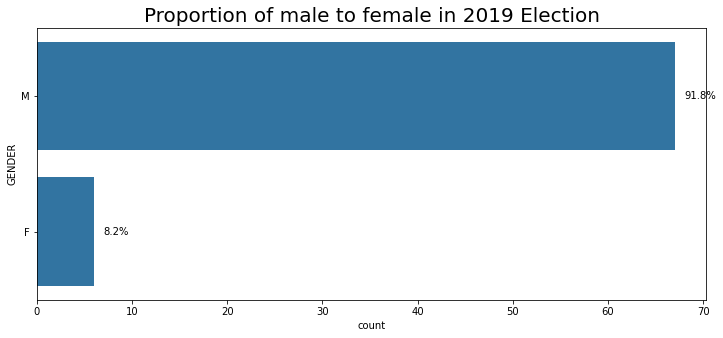

In [39]:
#considering the same chart above, print the text (proportion) on the bars
plt.figure(figsize=(12,5))
base_color = sns.color_palette()[0]
sns.countplot(data=candi_2019_copy, y='GENDER',color=base_color, order=gen_order);
#plt.rcParams['figure.figsize'] = 12,4
#logic to print the proportion text on the bars
for i in range(gender.shape[0]):
    
    #remember type_counts contains the frequency of unique values in the 'type' column in decreasing order.
    count = gender[i]
    #convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/no_candi)
    #print the string value on the bar.
    plt.title('Proportion of male to female in 2019 Election', fontsize = 20)
    plt.text(count+1, i, pct_string, va='center')

There are 67 males(92%) and 6 female(8%)

### 4) How many votes did each candidate have in 2015?

In [40]:
candi_2015 = df_2015[['Buhari', 'Jonathan', 'Ayeni', 'Galadima', 'Eke', 'Salau',
       'Ahmad', 'Chinedu', 'Onovo', 'Kelani', 'Okorie', 'Sonaiya', 'Okoye',
       'Owuru']]

In [41]:
candi_sum = candi_2015.sum()
candi_sum

Buhari      15424921
Jonathan    12853162
Ayeni          53537
Galadima       40311
Eke            36300
Salau          30673
Ahmad          29666
Chinedu        24475
Onovo          24455
Kelani         22125
Okorie         18220
Sonaiya        13076
Okoye           9208
Owuru           7435
dtype: int64

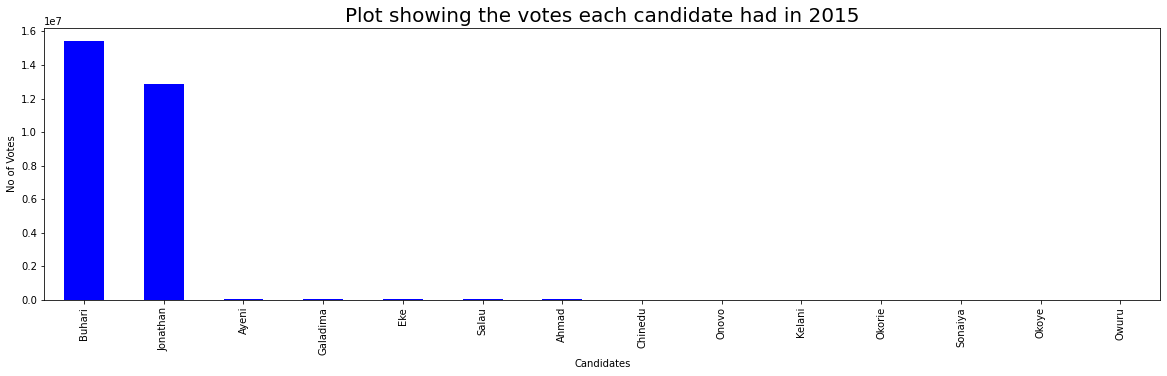

In [42]:
candi_sum.plot(kind='bar', figsize=(20, 5), color='blue')
plt.title('Plot showing the votes each candidate had in 2015', fontsize = 20)
plt.xlabel('Candidates')
plt.ylabel('No of Votes')
plt.show()

The visualization shows that it was a two candidate race in 2015 as Buhari and Jonathan had the highest votes of 15424921 and 12853162 respectively. 

### 5) How many votes did each candidate have in 2019?

In [43]:
candi_2019 = df_2019[['Buhari','Atiku','Nicolas', 'Sowore', 'Moghalu',
       'Durotoye', 'Duke', 'Mailafia']]

In [44]:
candi_sum = candi_2019.sum()
candi_sum

Buhari      15191847
Atiku       11262978
Nicolas        17916
Sowore         33953
Moghalu        21354
Durotoye       17371
Duke           34746
Mailafia       97874
dtype: int64

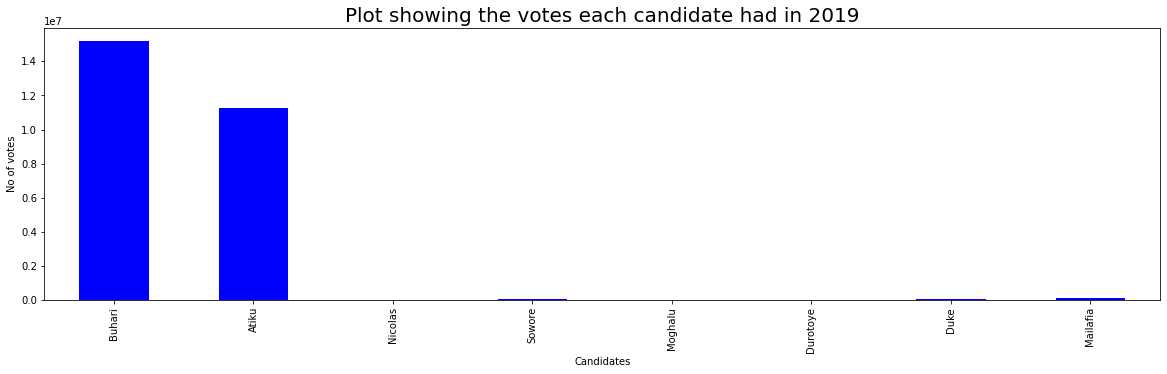

In [45]:
candi_sum.plot(kind='bar', figsize=(20, 5), color='blue')
plt.xlabel('Candidates', fontsize=10)
plt.ylabel('No of votes')
plt.title('Plot showing the votes each candidate had in 2019', fontsize = 20)
plt.show()

Similarly, it was a two candidate race in 2015 as Buhari and Atiku had the highest votes of 15191847 and 11262978 respectively.

### 6) Which region did the top two candidates have the most votes in the 2015?

In [46]:
df_2015.groupby('Region').sum()

,Buhari,Jonathan,Ayeni,Galadima,Eke,Salau,Ahmad,Chinedu,Onovo,Kelani,Okorie,Sonaiya,Okoye,Owuru
Region,,,,,,,,,,,,,,
North_Central,2411013,1715818,6719,4639,4423,2197,3151,2676,3414,1927,608,1165,615,718
North_East,2848678,796588,6102,2808,3289,2128,2081,2372,2749,1938,920,1392,628,675
North_West,7115199,1339709,16056,3278,9248,3305,3604,3667,3938,1809,989,2147,1337,1291
South_East,198248,2464906,10472,6102,5640,3082,5902,2950,5067,2262,8517,1758,3010,1738
South_South,418590,4714725,2686,3720,2552,3541,3904,2867,3157,4622,2155,3284,1350,1177
South_West,2433193,1821416,11502,19764,11148,16420,11024,9943,6130,9567,5031,3330,2268,1836


In [47]:
by_region_2015_buhari = df_2015.groupby('Region')['Buhari'].sum()
by_region_2015_buhari.sort_values(ascending=False)


Region
North_West       7115199
North_East       2848678
South_West       2433193
North_Central    2411013
South_South       418590
South_East        198248
Name: Buhari, dtype: int32

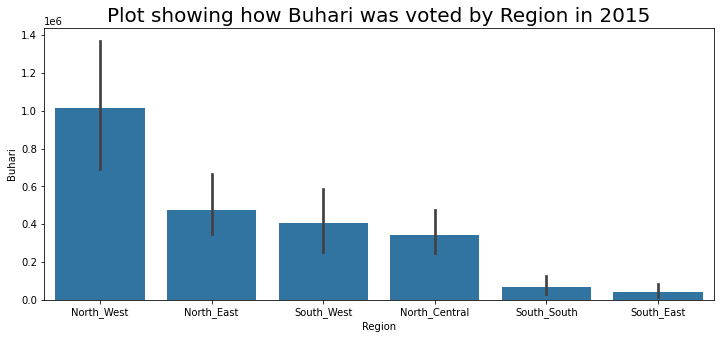

In [48]:
plt.figure(figsize=(12,5))
color = sns.color_palette()[0]
sns.barplot(data = df_2015, x='Region',y='Buhari', color = color)
plt.xticks(rotation=0)
plt.title('Plot showing how Buhari was voted by Region in 2015', fontsize=20)
plt.show()

Buhari got his highest number of votes from the North West region(7,115,199), followed by North East(2,848,678), South West (2,433,193)and North Central(2,411,013).

##### Jonathan

In [49]:
by_region_2015_jona = df_2015.groupby('Region')['Jonathan'].sum()
by_region_2015_jona.sort_values(ascending=False)

Region
South_South      4714725
South_East       2464906
South_West       1821416
North_Central    1715818
North_West       1339709
North_East        796588
Name: Jonathan, dtype: int32

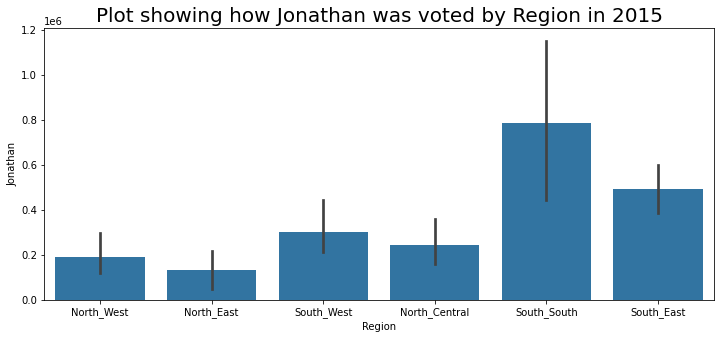

In [50]:
plt.figure(figsize=(12,5))
color = sns.color_palette()[0]
sns.barplot(data = df_2015, x='Region',y='Jonathan', color = color)
plt.xticks(rotation=0)
plt.title('Plot showing how Jonathan was voted by Region in 2015', fontsize=20)
plt.show()

Jonathan got his highest votes from the South South region(4,714,725), followed by South East(2,464,906), and South West(1,821,416).

### 7) Which region did the top two candidates have the most votes in the 2019?

In [51]:
df_2019.groupby('Region').sum()

,Buhari,Atiku,Nicolas,Sowore,Moghalu,Durotoye,Duke,Mailafia
Region,,,,,,,,
North_Central,2465599,2023769,2793,2210,2466,2350,8972,7142
North_East,3238783,1255357,5774,1152,454,387,3106,5207
North_West,5995651,2280465,0,1714,805,730,10291,2449
South_East,403968,1693485,5863,1227,6426,1708,2758,1665
South_South,1051396,2233232,3486,5694,1828,1178,4784,4156
South_West,2036450,1776670,0,21956,9375,11018,4835,77255


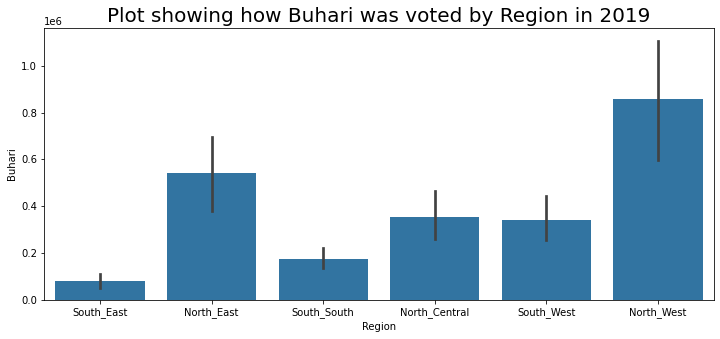

In [52]:
plt.figure(figsize=(12,5))
color = sns.color_palette()[0]
sns.barplot(data = df_2019, x='Region',y='Buhari', color = color)
plt.xticks(rotation=0)
plt.title('Plot showing how Buhari was voted by Region in 2019', fontsize=20)
plt.show()

In 2019 election, Buhari of APC had the highest votes from  North West, North East, North Central and South West.

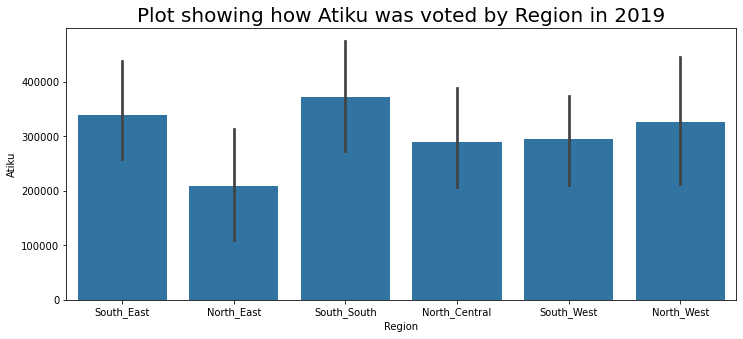

In [53]:
plt.figure(figsize=(12,5))
color = sns.color_palette()[0]
sns.barplot(data = df_2019, x='Region',y='Atiku', color = color)
plt.xticks(rotation=0)
plt.title('Plot showing how Atiku was voted by Region in 2019', fontsize=20)
plt.show()

In 2019 election, Atiku of PDP had the highest votes from South South followed by South East, North West.

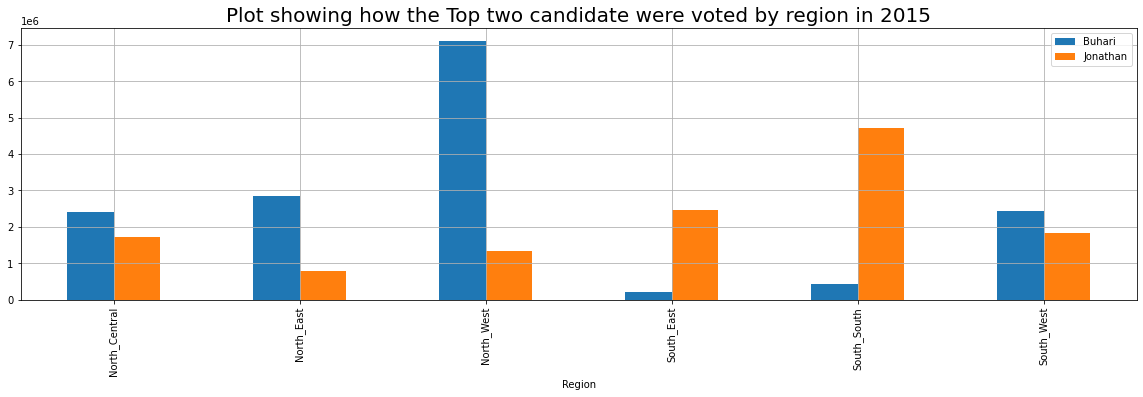

In [54]:
by_region = df_2015.groupby('Region').sum()
by_region.plot( y=['Buhari', 'Jonathan'], kind = 'bar', figsize=(20, 5), grid=1)
plt.title('Plot showing how the Top two candidate were voted by region in 2015', fontsize=20)
plt.show()

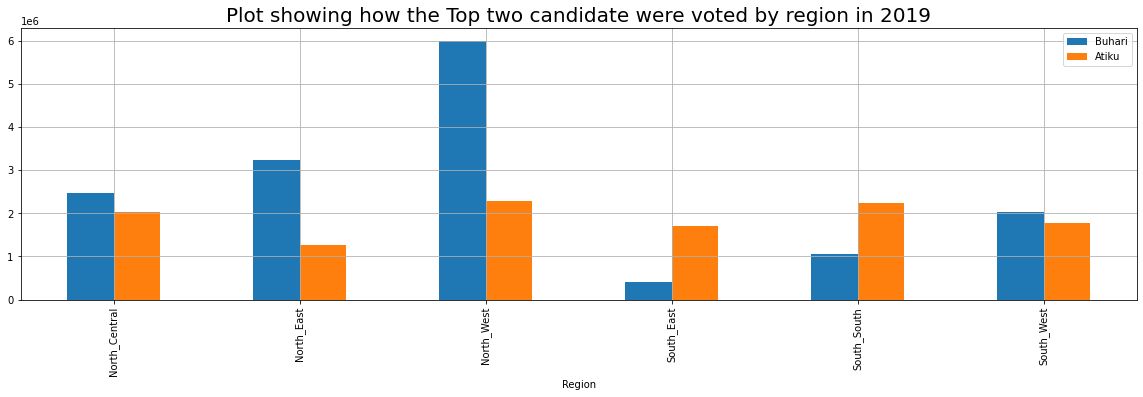

In [55]:
by_region = df_2019.groupby('Region').sum()
by_region.plot( y=['Buhari', 'Atiku'], kind = 'bar', figsize=(20, 5), grid=1)
plt.title('Plot showing how the Top two candidate were voted by region in 2019', fontsize=20)
plt.show()

In [56]:
winner_2015 =df_2015.Buhari.sum()
winner_2015

15424921

In [57]:
runner_up_2015 = df_2015.Jonathan.sum()
runner_up_2015

12853162

In [58]:
# % votes by the two candidates
w = ((winner_2015) / total_votes_2015) *100
w

53.95675196389591

In [59]:
r = ((runner_up_2015) / total_votes_2015) *100
r

44.96067590788778

Buhari got about 54% of the votes and Jonathan got 45% in 2015 election.

In [60]:
winner_2019 =df_2019.Buhari.sum()
winner_2019

15191847

In [61]:
runner_up_2019 =df_2019.Atiku.sum()
runner_up_2019

11262978

In [62]:
# % votes by the two candidates
((winner_2019) / total_votes_2019) *100

55.59772677958159

In [63]:
# % votes by the two candidates
((runner_up_2019) / total_votes_2019) *100

41.21921275065753

In [64]:
total_votes_2019

27324583

Buhari got a total of 15,191,847(56%) votes and atiku got 11,262,978(41%)

Buhari and Atiku had the most votes..so we focus on them

In [65]:
by_region = df_2019.groupby('Region').sum()

- Buhari had more votes in the Northern region of Nigeria and in the south west

- Atiku had more votes in South south and South East